In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


from keras.datasets import imdb

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
print('訓練集資料量:', len(x_train))
print('測試集資料量:', len(x_test))

訓練集資料量: 25000
測試集資料量: 25000


In [5]:
x_train[438]

[1,
 717,
 2,
 1184,
 2016,
 47,
 285,
 4,
 927,
 100,
 216,
 56,
 19,
 39,
 4,
 4748,
 2,
 325,
 8,
 4,
 178,
 3286,
 325,
 4,
 87,
 298,
 1263,
 2614,
 3698,
 11,
 94,
 2,
 4520,
 1422,
 8635,
 868,
 4312,
 2,
 5,
 6,
 1619,
 2582,
 43,
 54,
 25,
 197,
 4,
 114,
 426,
 79,
 101,
 2,
 12,
 127,
 45,
 2000,
 623,
 3028,
 11,
 3850,
 2,
 109,
 133,
 446,
 2247,
 2151,
 24,
 2,
 198,
 4,
 217,
 59,
 4203,
 9,
 3748,
 448,
 23,
 4,
 611,
 7,
 4,
 2839,
 6575,
 2,
 37,
 16,
 4,
 4727,
 7,
 4,
 711,
 7,
 2,
 5,
 2164,
 6,
 2634,
 54,
 29,
 520,
 41,
 4,
 6630,
 2,
 59,
 122,
 1090,
 8,
 4,
 298,
 1263,
 50,
 9,
 6,
 513,
 11,
 9455,
 446,
 2,
 121,
 59,
 2,
 448,
 23,
 4,
 1379,
 192,
 15,
 6575,
 2,
 122,
 837,
 4,
 217,
 7,
 2,
 50,
 2,
 2,
 5,
 4,
 1766,
 2,
 37,
 809,
 467,
 41,
 5759,
 26,
 24,
 4822,
 1863,
 885,
 13,
 2237,
 9,
 4,
 1619,
 1567,
 132,
 19,
 4,
 4536,
 1191,
 21,
 12,
 9,
 31,
 7,
 61,
 514,
 32,
 58,
 1250,
 2239,
 5,
 2,
 9,
 2,
 307,
 469]

In [6]:
print('第438筆訓練資料字數:',len(x_train[438]))
print('第7633筆訓練資料字數:',len(x_train[7633]))

第438筆訓練資料字數: 181
第7633筆訓練資料字數: 266


In [7]:
print('第438筆訓練資料是:',"正評" if y_train[438] else "負評")
print('第7633筆訓練資料是:',"正評" if y_train[7633] else "負評")

第438筆訓練資料是: 正評
第7633筆訓練資料是: 負評


In [8]:
from keras.preprocessing import sequence

In [9]:
x_train = sequence.pad_sequences(x_train, maxlen=350)
x_test = sequence.pad_sequences(x_test, maxlen=350)

In [10]:
x_train.shape

(25000, 350)

In [11]:
N = 500 # 壓到N維度
K = 30 # LSTM神經元數量

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(Embedding(10000, N))
model.add(Dropout(0.35))
model.add(LSTM(K))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 500)         5000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 500)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                63720     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 5,063,751.0
Trainable params: 5,063,751.0
Non-trainable params: 0.0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
model_his = model.fit(x_train, y_train,
            batch_size=50,
            epochs=5,
            validation_data = (x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 508s - loss: 0.4105 - acc: 0.8083 - val_loss: 0.3380 - val_acc: 0.8554
Epoch 2/5
25000/25000 [==============================] - 498s - loss: 0.2390 - acc: 0.9094 - val_loss: 0.3042 - val_acc: 0.8825
Epoch 3/5
25000/25000 [==============================] - 501s - loss: 0.1840 - acc: 0.9314 - val_loss: 0.3750 - val_acc: 0.8538
Epoch 4/5
25000/25000 [==============================] - 499s - loss: 0.1490 - acc: 0.9464 - val_loss: 0.3480 - val_acc: 0.8705
Epoch 5/5
25000/25000 [==============================] - 498s - loss: 0.1037 - acc: 0.9650 - val_loss: 0.4042 - val_acc: 0.8740


In [16]:
score = model.evaluate(x_test, y_test)
print('\n-----------結果如下-----------')
print(f'loss:{score[0]}')
print(f'正確率:{score[1]}')

25000/25000 [==============================] - 104s   

-----------結果如下-----------
loss:0.40421361731052396
正確率:0.874


<function matplotlib.pyplot.show(*args, **kw)>

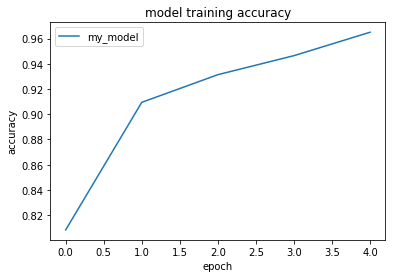

In [17]:
plt.plot(model_his.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["my_model"],loc = "best")
plt.show